--- KD-Tree Structure ---
((40, 85),
 ((10, 60), ((25, 20), None, None), ((10, 70), None, None)),
 ((70, 85), ((50, 50), None, None), ((80, 85), None, None)))
-------------------------


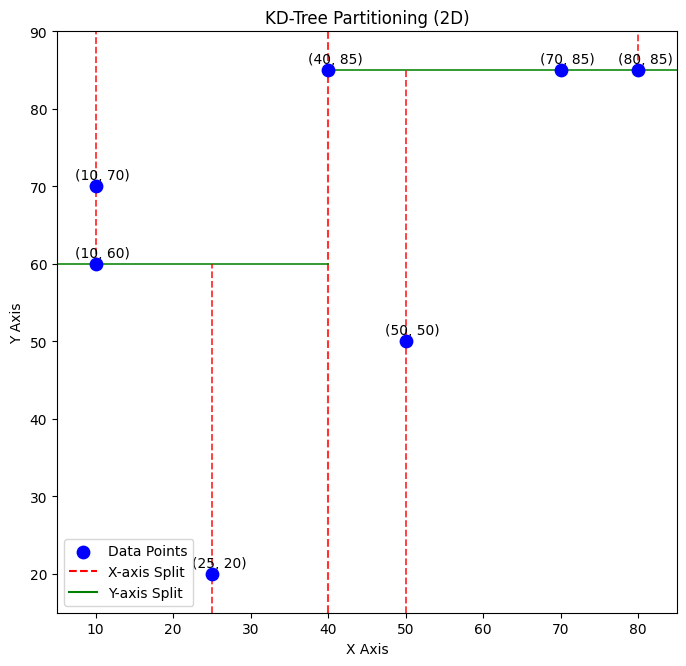

In [11]:
from collections import namedtuple
from operator import itemgetter
from pprint import pformat
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple, Optional

class Node(namedtuple("Node", "location left_child right_child")):
    def __repr__(self):
        return pformat(tuple(self))

def kdtree(point_list: List[Tuple[int, int]], depth: int = 0) -> Optional[Node]:

    if not point_list:
        return None

    k = len(point_list[0])
    axis = depth % k

    point_list.sort(key=itemgetter(axis))
    median = len(point_list) // 2

    return Node(
        location=point_list[median],
        left_child=kdtree(point_list[:median], depth + 1),
        right_child=kdtree(point_list[median + 1 :], depth + 1),
    )

def plot_kdtree(ax: plt.Axes, tree: Optional[Node],
                x_min: float, x_max: float, y_min: float, y_max: float, depth: int):

    if tree is None:
        return

    x, y = tree.location
    axis = depth % 2

    color = 'r' if axis == 0 else 'g'
    linestyle = '--' if axis == 0 else '-'
    linewidth = 1.5 - depth * 0.1

    if axis == 0:
        ax.plot([x, x], [y_min, y_max],
                linestyle=linestyle, color=color, linewidth=linewidth, alpha=0.8, zorder=1)

        plot_kdtree(ax, tree.left_child, x_min, x, y_min, y_max, depth + 1)
        plot_kdtree(ax, tree.right_child, x, x_max, y_min, y_max, depth + 1)

    else:
        ax.plot([x_min, x_max], [y, y],
                linestyle=linestyle, color=color, linewidth=linewidth, alpha=0.8, zorder=1)


        plot_kdtree(ax, tree.left_child, x_min, x_max, y_min, y, depth + 1)
        plot_kdtree(ax, tree.right_child, x_min, x_max, y, y_max, depth + 1)


def main():
    """예제 데이터로 KD-트리를 구축하고 시각화합니다."""
    point_list = [(50, 50), (10, 70), (80, 85), (25, 20), (40, 85), (70, 85), (10, 60)]

    tree = kdtree(point_list.copy())
    print("--- KD-Tree Structure ---")
    print(tree)
    print("-------------------------")

    points = np.array(point_list)


    PADDING = 5
    x_min, x_max = points[:, 0].min() - PADDING, points[:, 0].max() + PADDING
    y_min, y_max = points[:, 1].min() - PADDING, points[:, 1].max() + PADDING

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_title('KD-Tree Partitioning (2D)')


    ax.scatter(points[:, 0], points[:, 1], color='blue', s=80, zorder=5, label='Data Points')


    for p in point_list:
        ax.annotate(f'({p[0]}, {p[1]})', (p[0], p[1]), textcoords="offset points", xytext=(5, 5), ha='center')


    plot_kdtree(ax, tree, x_min, x_max, y_min, y_max, depth=0)


    ax.plot([], [], linestyle='--', color='r', label='X-axis Split')
    ax.plot([], [], linestyle='-', color='g', label='Y-axis Split')
    ax.legend(loc='lower left')

    plt.show()

if __name__ == "__main__":
    main()

#     --- KD-Tree Structure ---
# ((40, 85),
#  ((10, 60), ((25, 20), None, None), ((10, 70), None, None)),
#  ((70, 85), ((50, 50), None, None), ((80, 85), None, None)))
# ------------------------- 출력 시 결과